<a href="https://colab.research.google.com/github/Aurelien07/Kaggle_competition/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit  Recognizer project :

In this project, our outline will be something similar to this:

 -  Data Visualization
 -  Data Preprocessing
    - Data Normalisation
    - Splitting Data
    - Data Augmentation
 -  Model Selection (from scratch)
    -  Model Training
    -  Model Evaluation
    -  Predictions on Test Data
 -  Detection Script
 -  Conclusion


## Data Visualization :

In [1]:
def visu(data):
    """
    Displays a custom visualization of information from a DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        DataFrame containing the data to visualize.
    """

    print('-'*100)
    print(" " * 45 + '\033[1m' + "Shape :" + '\033[0m')
    print('-'*100)
    print(f"The shape in the DataFrame is: {data.shape}\n")
    print('-'*100)
    print(" " * 45 + '\033[1m' + "Head :" + '\033[0m')
    print('-'*100)
    
    while True:
        try:
            num_rows = int(input("The number of rows : "))
            if num_rows > 0:
                break
            else:
                print("The number of rows must be an integer.")
        except ValueError:
            print("Please enter an integer.")
    
    display(data.head(num_rows))
    
    print('-'*100)
    print(" " * 45 + '\033[1m' + "Describe :" + '\033[0m')
    print('-'*100)
    
    while True:
        columns = input("Names of columns (separated by commas): ")
        if columns:
            columns = [col.strip() for col in columns.split(',')]
            if all(col in data.columns for col in columns):
                break
            else:
                print("Some column names are invalid. Please try again.")
        else:
            break
    
    if columns:
        display(data[columns].describe().T)
    else:
        display(data.describe().T)
    
    print('-'*100)
    print(" " * 41 + '\033[1m' + "Data Types :" + '\033[0m')
    print('-'*100)
    display(data.dtypes)


### Data Exploration :

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from skimage import io

from keras.preprocessing.image import ImageDataGenerator

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/digit-recognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/digit-recognizer/test.csv
/content/drive/My Drive/Colab Notebooks/digit-recognizer/sample_submission.csv
/content/drive/My Drive/Colab Notebooks/digit-recognizer/train.csv
/content/drive/My Drive/Colab Notebooks/digit-recognizer/digit_recognizer.ipynb


In [6]:
test_ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/digit-recognizer/test.csv')
train_ds = pd.read_csv('/content/drive/My Drive/Colab Notebooks/digit-recognizer/train.csv')

let's vizualise the dataset first :

In [7]:
visu(train_ds)

----------------------------------------------------------------------------------------------------
                                             Shape :
----------------------------------------------------------------------------------------------------
The shape in the DataFrame is: (42000, 785)

----------------------------------------------------------------------------------------------------
                                             Head :
----------------------------------------------------------------------------------------------------
The number of rows : 5


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----------------------------------------------------------------------------------------------------
                                             Describe :
----------------------------------------------------------------------------------------------------
Names of columns (separated by commas): label


,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.88773,0.0,2.0,4.0,7.0,9.0


----------------------------------------------------------------------------------------------------
                                         Data Types :
----------------------------------------------------------------------------------------------------


label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Now let's start with our class number to know which number we will find.

### Data Analysis :

Here we will try to see how much number we have :

In [8]:
num_classes = len(train_ds['label'].unique()) # Count the number of unique number normally we will have 10

In [9]:
num_classes # Confirm we have 10 classes 

10



### Vizualisation of random number :

Now we will have some random vizualisation of the score :

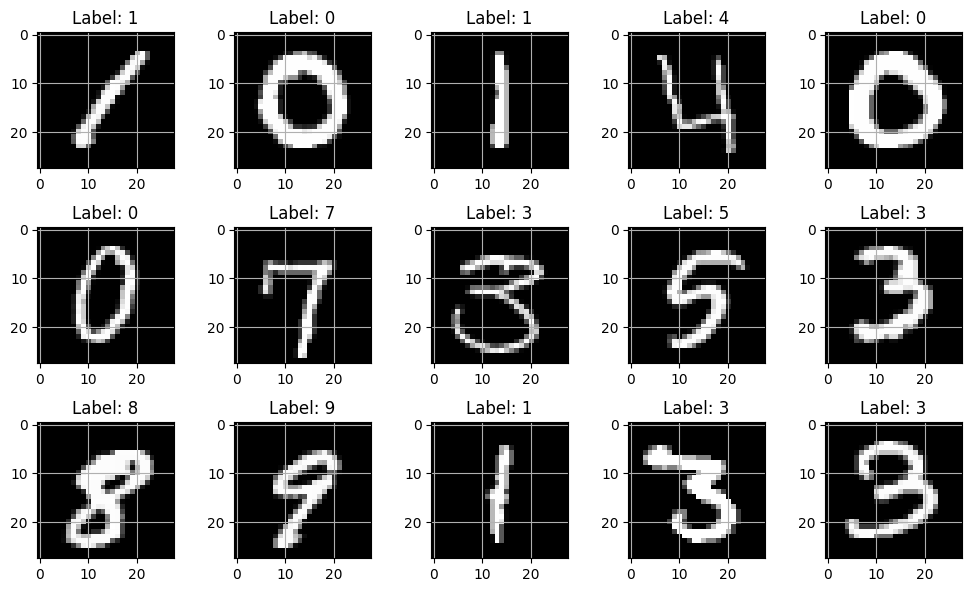

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# pixel = picture , labels = label :

pixels = train_ds.drop('label', axis=1).values
labels = train_ds['label'].values

# Show the first 15 picture with label :

fig, axes = plt.subplots(3, 5, figsize=(10, 6)) # 3 rows with 5 columns
axes = axes.flatten()

# loop for the first 15 images :
for i in range(15):
    img = pixels[i].reshape(28, 28)  # reshape in (28,28) pixel picture
    axes[i].imshow(img, cmap='gray') # grey because greyscale 
    axes[i].set_title(f"Label: {labels[i]}")
    axes[i].grid(True) # for a proper grid
  
plt.tight_layout()
plt.show()

## Data Preprocessing :

__Data Preprocessing :__

  - Pixel normalization (scaling the pixels to a range of 0 to 1)
  - Image resizing (if specific model input size is required)
  - Data augmentation (to increase the model's capacity and improve generalization)


In [11]:
from sklearn.preprocessing import RobustScaler
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data normalization :

In [12]:
# scaler (you can pick minmaxscaler here too)
scaler = RobustScaler()
normalized_pixels = scaler.fit_transform(pixels)

### Creation of a folder with all our images :

We will convert our data into images for test our script later on.

In [ ]:
# Path to the folder for saved images :

save_dir = "/content/drive/My Drive/Colab Notebooks/digit-recognizer/images"

# Control if the saved images folder is here or not :

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
else:
    print("The folder exist already. Images will not be recreated.")

# Conversion of data from CSV to .png with 28x28 pixels :

existing_images = os.listdir(save_dir)

if len(existing_images) == 0:
    for i, (pixel, label) in enumerate(zip(pixels, labels)):

        # Conversion from numpy array to image 28x28 :
        img = np.array(pixel, dtype=np.uint8).reshape((28, 28))

        # save the image with label :

        save_path = os.path.join(save_dir, f"image_{i}_label_{label}.png")
        io.imsave(save_path, img)

    print("Images created & saved. ")

In [ ]:
# Path of the folder :

image_paths = [os.path.join(save_dir, file) for file in os.listdir(save_dir)]

# Load the images :

images = [io.imread(image_path) for image_path in image_paths]

images = np.array(images)  # Convert the list into numpy array 

# First 10 pictures with label :

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

for i in range(10):
    img = images[i]
    label = labels[i]  # Label on every image
    axes[i].imshow(img, cmap='gray')  # Greyscale
    axes[i].set_title(f"Label: {label}")  
    
plt.tight_layout()
plt.show()

# 4 min for loading is a bit long i agree.. can be optimize..

### Greyscale :

My images have only one color, so grayscale here is not relevant.

### Split data :

For my analysis, I have decided to use only 20% of my data. 

This will allow me to have greater flexibility with my RAM.

For the train test if i want i can put a random_state = 0, with that i can nullify the random.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train the data with 20% of the dataset :

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2)

### Data Augmentation :

From ImageDataGenerator i added some settings :

  - __Rotation_range__: Here, the images can be rotated by a maximum of 10 degrees.

  - __Width_shift_range__ & __Height_shift_range__ : Here, the images can be horizontally or vertically shifted by a maximum of 10% of their width or height, respectively.

  - __Zoom_range__ : Here, the images can be zoomed in or out by a maximum of 10%.

I chose 10% and 10 degrees to avoid significant alterations to my images that could affect my analysis.

In [ ]:
# Data Augmentation :

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

# Add a dimension for Greyscale :

train_images = np.expand_dims(train_images, axis=-1)

# put data augmentation with our own data :

datagen.fit(train_images)

# show the augmented data :

augmented_images = datagen.flow(train_images, train_labels, batch_size=1, shuffle=False)

### Visualisation of Data Preprocessing : 

Data augmentation helps introduce variability in the data by applying random transformations to existing images.

It improves the model's generalization ability by providing it with more diverse data for training.

In [ ]:
print("Shape of Original data :", images.shape)
print("Shape of  augmented data :", augmented_images[0][0].shape)

In [ ]:
# Only first 15 labels :

generated_labels = train_labels[:15]

# show the data augmentation picture with label :

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
axes = axes.flatten()

for i in range(15):

    img = augmented_images[i][0].reshape(28, 28)  #  28x28 (norme)
    label = generated_labels[i]  # For the label
    axes[i].imshow(img, cmap='gray')  # Greyscale
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Create the model from scratch :

A "from scratch" model allows us to design a neural network with our own defined characteristics.

Thanks to this, we have complete control over the architecture of our model, the hyperparameters, and the optimization techniques we can use.

Despite all the advantages, if we train a model from scratch, it will require more time and computational resources, especially if we have a large number of images and the model is complex, which can lead to memory crashes or excessively long computation times.

### Import all library for Neural Network :

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

You have choice between Tensorflow and Pytorch but i prefer Tensorflow, because i learned with it.

### Creation of the Neural Network model :

- __EarlyStopping__ : I used this method with a patience of 3, which means that if the validation loss does not improve for 3 epochs, it allows me to save training time and memory, especially when using Colab.

- __ModelCheckpoint__ : This method allows me to save the best model and prevent loss of improvements during training.

- __CSVLogger__ : This method enables logging training and validation metrics to a CSV file. It allows me to visualize the metrics over epochs if desired.

- __Epochs__ : It refers to the number of times the model iterates over the data. The number of epochs determines how many times the model adjusts its parameters and improves its performance.

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

model_path = "/content/drive/My Drive/Colab Notebooks/digit-recognizer/model_scratch"

# Check if the folder exists, create it if necessary
model_folder = os.path.dirname(model_path)
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

if os.path.exists(model_path):
    # Load the existing model:
    model = keras.models.load_model(model_path)
    print("The model has already been loaded.")
else:
    # Create the model:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define the callbacks:
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpointer = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max')
    csv_logger = CSVLogger('/content/drive/My Drive/Colab Notebooks/digit-recognizer/model_scratch.log')

    # Train the model:
    history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), 
                        epochs=100, 
                        validation_data=(val_images, val_labels),
                        callbacks=[early_stopping, checkpointer, csv_logger])

    # Save the model:
    model.save(model_path)
    print("The model has been successfully saved.")


If we want to optimize, we could add additional __layers of convolution__ and test them gradually.

We could also try changing the utilization __metrics__ for the model.

Lastly, we could use __dropouts__ to make the model more robust by randomly eliminating data to enhance its resilience.

### Vizualisation of the score :

#### For Accuracy - Validation Accuracy :

In [ ]:
accuracy_plot_path = "/content/drive/My Drive/Colab Notebooks/digit-recognizer/scratch_accuracy.png"

if not os.path.exists(accuracy_plot_path):
    plt.figure(figsize=(12, 10))
    plt.title('Model Accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.savefig(accuracy_plot_path, transparent=False, bbox_inches='tight', dpi=900)
    plt.grid(True)
    plt.show()
else:
    plt.imshow(plt.imread(accuracy_plot_path))
    plt.show()

- This graph shows that the model is training well and is capable of __recognizing the digits with increasing accuracy__.

- We can also see that the __loss decreases over time__, indicating that the __model is adjusting__ its __parameters__ to better align with the true labels of the images.

- The training and validation accuracy curves are similar, suggesting that we are __not experiencing overfitting__.

- Finally, the __early stopping__ has effectively __optimized__ the model before overfitting occurs.

- Overall, these observations indicate that the __model is performing__ well and is able to generalize to new data.

#### for Loss - Validation Loss :

In [ ]:
loss_plot_path = "/content/drive/My Drive/Colab Notebooks/digit-recognizer/scratch_loss.png"


if not os.path.exists(loss_plot_path):
    plt.figure(figsize=(12, 10))
    plt.title('Model Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.savefig(loss_plot_path, transparent=False, bbox_inches='tight', dpi=900)
    plt.grid(True)
    plt.show()

else:
  
    plt.imshow(plt.imread(loss_plot_path))

- __Loss___ : We observe an __effective reduction__ in errors on our Loss curve.

- __Validation Loss__ : We see a stabilization or slight increase, suggesting that we are __reaching the limit of our model__.

- __Precision/Loss Gap__ : The gap between the two is widening, indicating that we are __starting to approach overfitting__.

- In conclusion, our model is starting to lean towards __overfitting__ or __becoming too specialized__ to our data. The solution would be to either modify our model to improve its performance or increase data augmentation to __introduce more diverse data__ that differs from our current dataset.

## Prédiction du modéle :

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Path to the image folder:
image_folder = '/content/drive/My Drive/Colab Notebooks/digit-recognizer/images'

# List of images inside the folder:
image_files = os.listdir(image_folder)

# Pick a random image:
random_image_file = random.choice(image_files)
image_path = os.path.join(image_folder, random_image_file)

# Extract the label from the image file name:
label = int(random_image_file.split("_")[1].split(".")[0])

# Load the image:
image = Image.open(image_path)
image_array = np.array(image)  # Convert image to numpy array

# Show the image:
plt.imshow(image_array, cmap='gray')
plt.axis('off')

# Preprocess the image:
preprocessed_image = image.resize((28, 28))  # Resize image
preprocessed_image = np.array(preprocessed_image)  # Convert to numpy array
preprocessed_image = preprocessed_image / 255.0  # Normalize pixel values to (0, 1)
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)  # Add a dimension

# Load the model:
model_path = "/content/drive/My Drive/Colab Notebooks/digit-recognizer/model_scratch"
model = keras.models.load_model(model_path)

# Make prediction:
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction)
prediction_percentage = np.max(prediction) * 100

# Show the prediction:
label_text = f"Label: {label}"
prediction_text = f"Prediction: {predicted_class} ({prediction_percentage:.2f}%)"
plt.text(10, 10, label_text, bbox=dict(facecolor='white', alpha=0.8))
plt.text(10, 30, prediction_text, bbox=dict(facecolor='white', alpha=0.8))

plt.show()
